In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv("D:\Đồ án PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1240,2024-02-23,12650,12750,12500,12550,469600
1241,2024-02-26,12550,12850,12500,12800,627300
1242,2024-02-27,12800,12850,11950,12700,293900
1243,2024-02-28,12900,12900,12650,12650,494700


In [3]:
data_model = data[['close']]
split = int(len(data)*0.9)
train = data_model[:split]
test = data_model[split:]

In [4]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16975.872, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17008.965, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16982.239, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16976.372, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17008.260, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16973.876, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16971.989, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16973.976, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16972.793, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16975.114, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16971.148, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16975.402, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16973.045, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=16973.150, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1120
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -8482.574
Date:                Sun, 05 May 2024   AIC                          16971.148
Time:                        23:33:06   BIC                          16986.208
Sample:                             0   HQIC                         16976.840
                               - 1120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1667      0.020      8.172      0.000       0.127       0.207
ma.L2         -0.0720      0.023     -3.081      0.002      -0.118      -0.026
sigma2      2.246e+05   7163.421     31.361      0.0

In [6]:
predictions = model.predict(n_periods=len(test)+30)
predict_test = predictions[:-30]
next_30_days = predictions[-30:]

In [7]:
result = test[['close']]
result['predictions'] = predict_test.round(2)
result.head(30)

,close,predictions
1120,12800,12977.47
1121,12850,12949.10
1122,13000,12949.10
1123,13500,12949.10
1124,13350,12949.10
1125,13250,12949.10
1126,13300,12949.10
1127,13350,12949.10
1128,13050,12949.10
1129,12900,12949.10


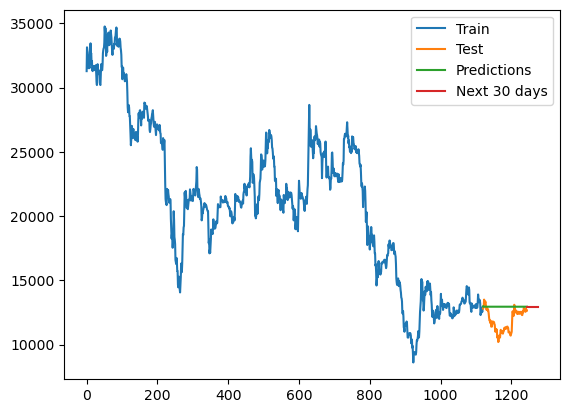

In [8]:
plt.plot(train.index,train["close"])
plt.plot(test.index,test['close'])
plt.plot(test.index,predict_test)
plt.plot(next_30_days.index,next_30_days)
plt.legend(["Train","Test","Predictions","Next 30 days"])
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
rmse = np.sqrt(mean_squared_error(test, predict_test))
mape = mean_absolute_percentage_error(test, predict_test) * 100
msle = mean_squared_log_error(test, predict_test)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1350.9644676335613
MAPE: 9.797352342632323 %
MSLE: 0.012747269985819144
